# Tech Challende - Vinícola

Expert em Data Analytics de uma exportadora de vinhos do Brasil para o mundo.  Este estudo é direcionado pala geração de relatórios iniciais a serem apresentados em uma reunião de investidores. 

**I**

- Quantidade de vinhos
- Fatores externos que podem vir a surgir e interferir nas análises. Ex: Dados climáticos, demográficos, econômicos e avaliações de vinhos. 

**II**

- Tabela: Países de origem (BR) | Países de destino | Quantidade de L de vinho exportado (1kg = 1L) | Valor em US$
    
### Objetivo
1. Montante de venda exportação dos últimos 15 anos
    1. Trazer prospecções futuras
    2. Possíveis ações de melhorias nas exportações 
2. Gráficos atraentes para que acionistas e investidores possam tomar decisões e seguir em frente
3. Utilizar varias bases do mesmo site

    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando o arquivo .csv com a base de Exportação de Vinhos
df = pd.read_csv('ExpVinho.csv', encoding='ISO-8859-1', sep=';', thousands='.', engine='python', decimal=',', index_col=None) 
df.head(5)

,Id,País,QTD-1970,1970,QTD-1971,1971,QTD-1972,1972,QTD-1973,1973,...,QTD-2018,2018,QTD-2019,2019,QTD-2020,2020,QTD-2021,2021,QTD-2022,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Remove a primeira coluna de id
df = df.iloc[:, 1:]
# Torna a primeira coluna de País no Index
df = df.set_index('País')
# Confirma
df.head(5)

,QTD-1970,1970,QTD-1971,1971,QTD-1972,1972,QTD-1973,1973,QTD-1974,1974,...,QTD-2018,2018,QTD-2019,2019,QTD-2020,2020,QTD-2021,2021,QTD-2022,2022
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,0,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Pega os últimos 15 anos que nos interessam
anos_desejados = df.columns[-30:]
vinicola_15_anos = df[anos_desejados]
vinicola_15_anos

,QTD-2008,2008,QTD-2009,2009,QTD-2010,2010,QTD-2011,2011,QTD-2012,2012,...,QTD-2018,2018,QTD-2019,2019,QTD-2020,2020,QTD-2021,2021,QTD-2022,2022
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
Uruguai,0,0,0,0,914,2929,1238,4404,1135,3879,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0


In [12]:
# Separo em 2 DF, de quantidade e de valor gasto. 
colunas_QTD = ["QTD-2008", "QTD-2009", "QTD-2010", "QTD-2011", "QTD-2012", "QTD-2013", "QTD-2014",
               "QTD-2015", "QTD-2016", "QTD-2017", "QTD-2018", "QTD-2019", "QTD-2020", "QTD-2021", "QTD-2022"]
colunas_valor = ["2008", "2009", "2010", "2011", "2012", "2013", "2014",
               "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

vinicola_15_anos_QTD = vinicola_15_anos[colunas_QTD]
vinicola_15_anos_valor = vinicola_15_anos[colunas_valor]

# Criando uma coluna de Total para a tabela de Quantidade
vinicola_15_anos_QTD['Total'] = vinicola_15_anos_QTD.sum(axis=1)
# Apagando as linhas onde o total da quantidade é igual a zero
vinicola_15_anos_QTD = vinicola_15_anos_QTD[vinicola_15_anos_QTD['Total'] != 0]

# Criando uma coluna de Total para a tabela de valor
vinicola_15_anos_valor['Total'] = vinicola_15_anos_valor.sum(axis=1)
# Apagando as linhas onde o total de valor é igual a zero
vinicola_15_anos_valor = vinicola_15_anos_valor[vinicola_15_anos_valor['Total'] != 0]

# Criando um df só com os nomes de países e quantidade total e ordenando do maior pro menor
QTD_Total = vinicola_15_anos_QTD[['Total']]
QTD_Total = QTD_Total.sort_values(by='Total', ascending=False)
# Criando um df só com os nomes de países e valor total e ordenando do maior pro menor
Valor_Total = vinicola_15_anos_valor[['Total']]
Valor_Total = Valor_Total.sort_values(by='Total', ascending=False)

In [13]:
vinicola_15_anos_QTD.head(5)

,QTD-2008,QTD-2009,QTD-2010,QTD-2011,QTD-2012,QTD-2013,QTD-2014,QTD-2015,QTD-2016,QTD-2017,QTD-2018,QTD-2019,QTD-2020,QTD-2021,QTD-2022,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11
Africa do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,30
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,909051
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,168868
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,37,219,624,805,419,2104


In [14]:
vinicola_15_anos_valor.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46
Africa do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,2546394
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,576189
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866,7738


In [15]:
QTD_Total.head(5)

,Total
País,
Rússia,39029799
Paraguai,29214770
Estados Unidos,3563355
China,2509458
Espanha,1993000


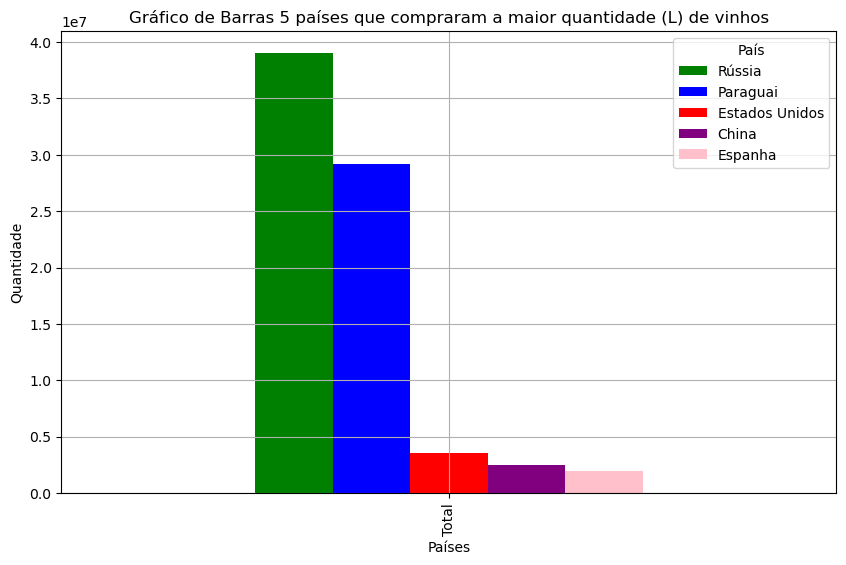

In [34]:
# Analisando os 5 países que gastaram o maior valor comprando nos últimos 15 anos
cores = ['green', 'blue',  'red', 'purple', 'pink']
ax = QTD_Total.head(5).T.plot(kind='bar', color=cores, figsize=(10, 6))
plt.xlabel('Países')
plt.ylabel('Quantidade')
plt.title('Gráfico de Barras 5 países que compraram a maior quantidade (L) de vinhos')
# Criar o gráfico de barras
ax.grid(True)

plt.show()

In [21]:
Valor_Total.head(5)

,Total
País,
Paraguai,38719031
Rússia,25504484
Estados Unidos,9684567
China,4746525
Reino Unido,4711464


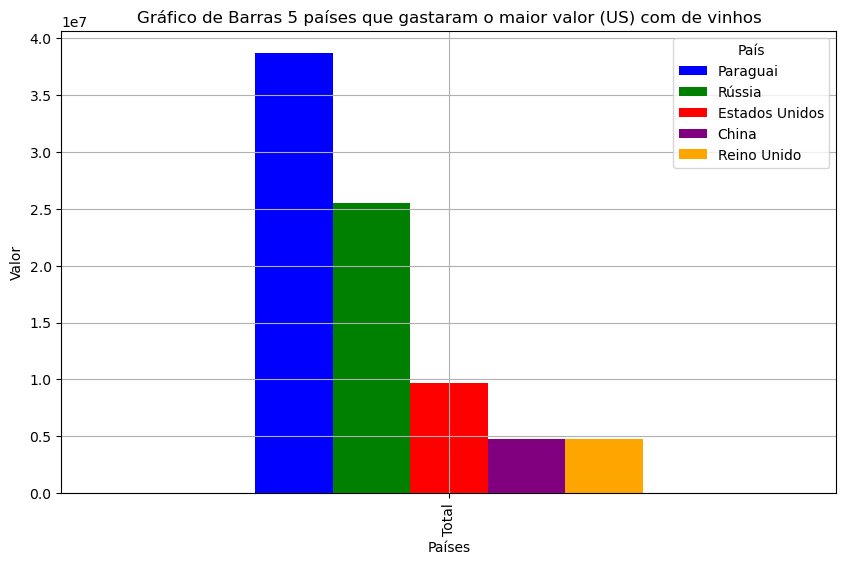

In [33]:
# Analisando os 5 países que gastaram o maior valor comprando nos últimos 15 anos
cores = ['blue', 'green', 'red', 'purple', 'orange']
ax = Valor_Total.head(5).T.plot(kind='bar', color=cores, figsize=(10, 6))
plt.xlabel('Países')
plt.ylabel('Valor')
plt.title('Gráfico de Barras 5 países que gastaram o maior valor (US) com de vinhos')
# Criar o gráfico de barras
ax.grid(True)

plt.show()

In [35]:
#tentativa de ajuste no eixo Y

# Selecionar os países e valores correspondentes
#paises = Valor_Total.head(5).index
#valores = Valor_Total.head(5)['Total']
# Criar o gráfico de barras
#ax = valores.plot(kind='bar', figsize=(10, 6))
# Definir os rótulos dos eixos
#plt.xlabel('Países')
#plt.ylabel('Valor')
#plt.title('Gráfico de Barras 5 países que gastaram o maior valor (US) com vinhos')
# Definir os rótulos do eixo X como os nomes dos países
#ax.set_xticklabels(paises)
#ax.grid(True)
#plt.show()

### Justificativa: 
*Alguns países que aparecem no gráfico de quantidade e no de valor não aparecem ou aparecem em uma outra posição dentro do gráfico de valor, provávelmente compram mais do brasil vinhos de valor mais baixo. 

In [39]:
# Puxando as quantidades/valores dos paises que estão no ranking dos 5 que mais compraram e tendo uma
# visão por ano, dos últimos 15 anos.
paises_selecionados = ["Rússia", "Paraguai", "Estados Unidos", "China", "Reino Unido", "Espanha"]
QTD_anos = vinicola_15_anos_QTD.loc[paises_selecionados]
Valor_anos = vinicola_15_anos_valor.loc[paises_selecionados]

In [40]:
QTD_anos.head(6)

,QTD-2008,QTD-2009,QTD-2010,QTD-2011,QTD-2012,QTD-2013,QTD-2014,QTD-2015,QTD-2016,QTD-2017,QTD-2018,QTD-2019,QTD-2020,QTD-2021,QTD-2022,Total
País,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,39029799
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,29214770
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,3563355
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,2509458
Reino Unido,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,18835,1239551
Espanha,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,1993000


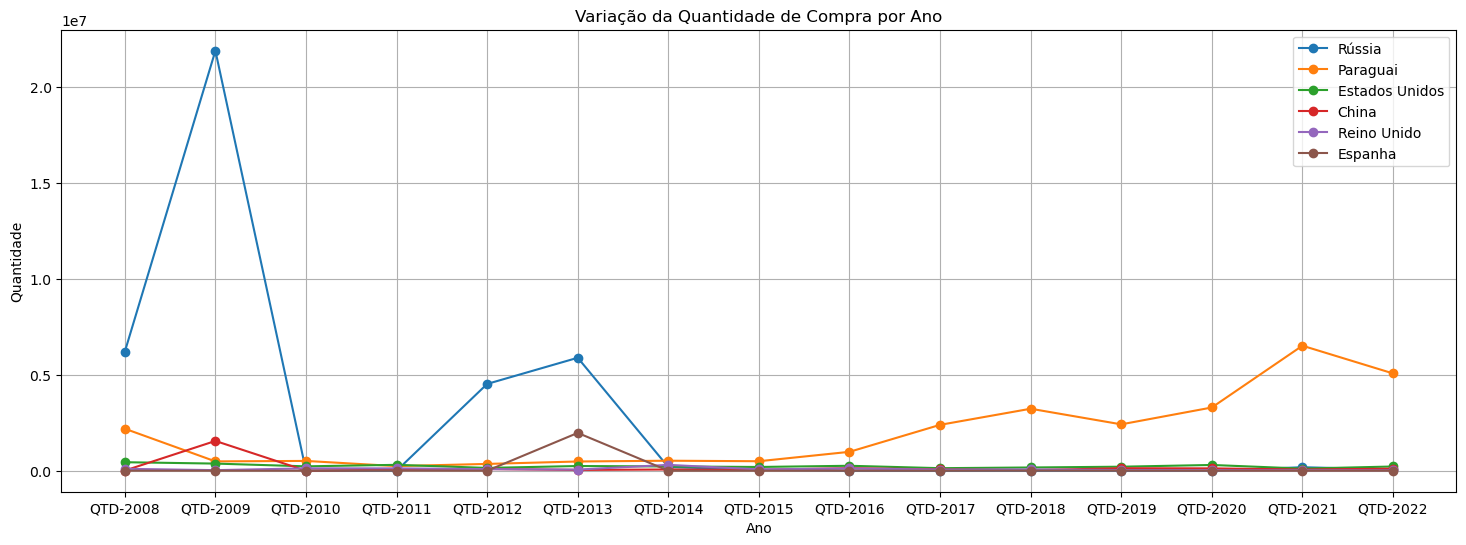

In [47]:
# Seleciona apenas as colunas de 2008 a 2022 (excluindo a coluna 'Total')
colunas_anos = QTD_anos.columns[:-1]

# Transpõe o DataFrame para ter anos no eixo x
QTD_anos_transposto = QTD_anos[colunas_anos].T

# Configuração do gráfico de linhas
plt.figure(figsize=(18, 6))
plt.plot(QTD_anos_transposto, marker='o')  # 'o' para adicionar marcadores nos pontos
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Variação da Quantidade de Compra por Ano')

# Adiciona rótulos para as linhas (países)
for pais in QTD_anos.index:
    plt.annotate(pais, xy=(2022, QTD_anos.loc[pais, 'Total']), xytext=(-15, 5), textcoords='offset points')

plt.grid(True)
plt.legend(QTD_anos.index)
plt.show()

In [41]:
Valor_anos.head(6)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
País,,,,,,,,,,,,,,,,
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,25504484
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,9684567
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,4746525
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,4711464
Espanha,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,3808552


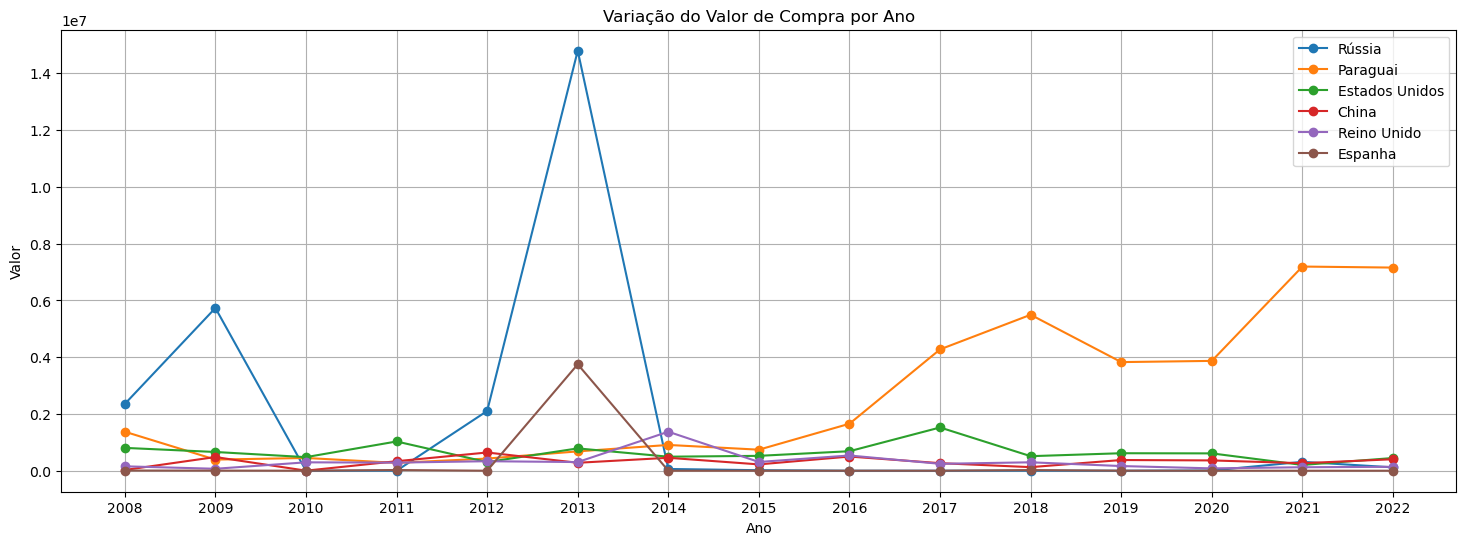

In [48]:
# Seleciona apenas as colunas de 2008 a 2022 (excluindo a coluna 'Total')
colunas_anos = Valor_anos.columns[:-1]

# Transpõe o DataFrame para ter anos no eixo x
Valor_anos_transposto = Valor_anos[colunas_anos].T

# Configuração do gráfico de linhas
plt.figure(figsize=(18, 6))
plt.plot(Valor_anos_transposto, marker='o')  # 'o' para adicionar marcadores nos pontos
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Variação do Valor de Compra por Ano')

# Adiciona rótulos para as linhas (países)
for pais in Valor_anos.index:
    plt.annotate(pais, xy=(2022, Valor_anos.loc[pais, 'Total']), xytext=(-15, 5), textcoords='offset points')

plt.grid(True)
plt.legend(Valor_anos.index)
plt.show()


**Russia**
Em 2008, a Rússia cresceu 6% [13] e foi a 9ª economia do mundo. No entanto, diante da Grande Recessão e a queda dos preços do petróleo, as perspectivas para 2009 são mais sombrias. Em dezembro de 2008, a ministra da Economia, Elvira Nabiullina, previu 2,4% de crescimento do PIB para 2009, o índice mais baixo desde 1998 - o fatídico ano da moratória russa.

Apesar do forte crescimento económico na década de 2000, a economia russa entrou em recessão ao fim de 2014, intensificando-se em 2015. Vários fatores contribuíram para esta nova crise, incluindo a queda nos preços do petróleo no mercado mundial, as sanções económicas impostas pelos países da Europa Ocidental, EUA e aliados como resposta a intervenção militar da Rússia na Ucrânia e a subsequente evasão de divisas.

**Paraguai**
A economia do Paraguai, tradicionalmente tem se sustentado na produção primária, em particular na produção agrícola e pecuária, com um pujante setor comercial, no qual a exportação de produtos como a soja, grãos e carne bovina, bem como a produção e a exportação de energia elétrica, além da reexportação. o PIB cresceu 14,1% em 2013.
O Paraguai foi o maior importador de vinho brasileiro em 2016, segundo dados inéditos do Ministério da Indústria e Comércio Exterior. Foram importados cerca de 1 milhão de litros do produto no ano passado, ao custo de US$ 1,7 milhão no total.